In [111]:
# importation des libraries

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn import metrics



# lecture des données et mise en forme

df = pd.read_csv('Données historiques Bitcoin - Investing.com.csv', encoding='utf-8')
df["Date"] = pd.to_datetime(df["Date"],infer_datetime_format=True)

# df = df[['Date','Vol.','Variation %','Ouv.', 'Plus Haut', 'Plus Bas']]

df.sort_values('Date',ascending=False)


,Date,Dernier,Ouv.,Plus Haut,Plus Bas,Vol.,Variation %
4366,2022-07-01,"19.262,9","19.926,6","20.785,6","18.980,1","150,18K","-3,33%"
4365,2022-06-30,"19.926,6","20.111,3","20.155,1","18.682,7","127,73K","-0,92%"
4364,2022-06-29,"20.111,3","20.278,0","20.415,8","19.880,7","98,97K","-0,82%"
4363,2022-06-28,"20.278,0","20.727,9","21.200,2","20.210,5","83,83K","-2,18%"
4362,2022-06-27,"20.730,2","21.037,7","21.497,5","20.568,0","84,69K","-1,49%"
...,...,...,...,...,...,...,...
4,2010-07-22,"0,1","0,1","0,1","0,1","2,16K","0,00%"
3,2010-07-21,"0,1","0,1","0,1","0,1","0,58K","0,00%"
2,2010-07-20,"0,1","0,1","0,1","0,1","0,26K","0,00%"
1,2010-07-19,"0,1","0,1","0,1","0,1","0,57K","0,00%"


Source et collecte des données : https://fr.investing.com/crypto/bitcoin/historical-data

Prix journalier du BTC du 18/07/2010 au 01/07/2022 ,4367 elements

Nous souhaitons prédire le prix du btc, notre target sera donc le dernier prix connu journalier (prix a la fermeture de la séance), il s'agit donc d'une variable quantitative continue


In [112]:
# nettoyage données 

df['Date'] = df['Date'].values.astype('datetime64[D]')
df['Ouv.'] = df['Ouv.'].str.replace('.','').str.replace(',','.').astype(float)
df['Dernier'] = df['Dernier'].str.replace('.','').str.replace(',','.').astype(float)
df['Plus Haut'] = df['Plus Haut'].str.replace('.','').str.replace(',','.').astype(float)
df['Plus Bas'] = df['Plus Bas'].str.replace('.','').str.replace(',','.').astype(float)
# df['Vol.'] = df['Vol.'].str.replace(',','').str.replace('K','000').str.replace('M','000000').astype(float)

#  definition des colonnes features et target 

date = df['Date']
open = df['Ouv.']
close = df['Dernier']
High = df['Plus Haut']
low = df['Plus Bas']
volume = df['Vol.']
variation = df['Variation %']

features = df[['Ouv.','Plus Haut','Plus Bas']]
target = close




0         0,08K
1         0,57K
2         0,26K
3         0,58K
4         2,16K
         ...   
4362     84,69K
4363     83,83K
4364     98,97K
4365    127,73K
4366    150,18K
Name: Vol., Length: 4367, dtype: object


C:\Users\ninja\AppData\Local\Temp/ipykernel_4440/1638381150.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Ouv.'] = df['Ouv.'].str.replace('.','').str.replace(',','.').astype(float)
C:\Users\ninja\AppData\Local\Temp/ipykernel_4440/1638381150.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Dernier'] = df['Dernier'].str.replace('.','').str.replace(',','.').astype(float)
C:\Users\ninja\AppData\Local\Temp/ipykernel_4440/1638381150.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Plus Haut'] = df['Plus

Evolution du prix du BTC sur le temps

<AxesSubplot:xlabel='Date', ylabel='Dernier'>

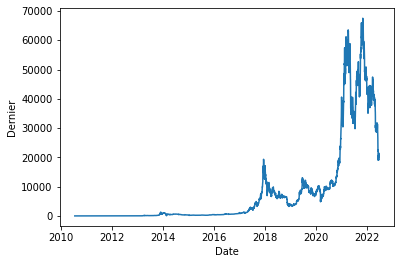

In [113]:
sns.lineplot(x=date,y=close)



In [134]:
x_train, x_test, y_train, y_test = train_test_split(features,target,)

reg = SGDRegressor(max_iter=10**6,eta0=0.0001)
reg.fit(x_train,y_train)

# score du modele
print(reg.score(x_train,y_train))
print(reg.coef_, reg.intercept_)




-6.196336725347398e+18
[-7.14664202e+10  2.44733562e+10  4.66389772e+10] [-4.91413069e+09]
